MACHINE LEARNING APPROACH IN PREDICTING BACK ORDER IN SUPPLY CHAIN SYSTEM(PROJECT 7150CEM)

In [ ]:
!pip install imbalanced-learn

LOADING OF THE LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from math import log
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA


In [ ]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, RFECV
from sklearn.utils import resample
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE

READING OF THE DATA

A CSV file named back order train.csv is read into a Pandas DataFrame with the code df = pd.read_csv("back order train.csv"). Pandas is a Python data analysis library. A data structure called a DataFrame can hold data in a tabular fashion.

The pd module from the Pandas library is initially imported by the code. The CSV file read by the read_csv() function into DataFrame. The filename of the CSV file is delivered to the read_csv() function as an argument.. The filename in this instance is back order train.csv.

A DataFrame object is returned by the read_csv() function. The data in the CSV file used to accessed using the object. The df object,access the names of the columns, the information included in the rows, and the total number of rows and columns in the DataFrame.[link text](https://)

In [ ]:
df = pd.read_csv('back order train.csv')

READING THE NUMBER OF HEADS, THE FIRST FIVE ROWS

In [ ]:
df.head() ####read the first 5rows

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0,NaN,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,No,No,No,Yes,No,No
1,1043384,2,9.0,0,0,0,0,0,0,0,...,0,0.99,0.99,0,No,No,No,Yes,No,No
2,1043696,2,NaN,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No
3,1043852,7,8.0,0,0,0,0,0,0,0,...,0,0.10,0.13,0,No,No,No,Yes,No,No
4,1044048,8,NaN,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No


SHOWING THE TAIL OF THE FIRST FIVE ROWS OF THE 23 COLUMN

In [ ]:
df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1048570,1407727,0,2.0,0,2,2,2,0,0,0,...,0,0.63,0.72,0,Yes,No,No,Yes,No,No
1048571,1407728,359,2.0,176,224,504,840,116,195,200,...,0,0.92,0.84,0,Yes,No,No,Yes,No,No
1048572,1407730,0,NaN,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1048573,1407731,0,2.0,0,12,12,12,0,0,0,...,0,0.24,0.28,0,No,No,No,No,No,No
1048574,1407732,0,2.0,0,12,12,12,0,0,0,...,0,0.92,0.95,0,Yes,No,No,Yes,No,No


DATA INFOR
**bold text**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1048575 non-null  int64  
 1   national_inv       1048575 non-null  int64  
 2   lead_time          984057 non-null   float64
 3   in_transit_qty     1048575 non-null  int64  
 4   forecast_3_month   1048575 non-null  int64  
 5   forecast_6_month   1048575 non-null  int64  
 6   forecast_9_month   1048575 non-null  int64  
 7   sales_1_month      1048575 non-null  int64  
 8   sales_3_month      1048575 non-null  int64  
 9   sales_6_month      1048575 non-null  int64  
 10  sales_9_month      1048575 non-null  int64  
 11  min_bank           1048575 non-null  int64  
 12  potential_issue    1048575 non-null  object 
 13  pieces_past_due    1048575 non-null  int64  
 14  perf_6_month_avg   1048575 non-null  float64
 15  perf_12_month_avg  1048575 non-n

CREATING THE LIST OF CONDITION WHEN WENT_ON_BACKORDER AS (TARGET VARIBLE) IS NO AND YES RESPECTIVELY REPRESENT AS (0,1)

The went_on_backorder column's value build a new column called Target and add values to it. "No" and "Yes" are the two possible values for the went_on_backorder field. When "No" appears in the went_on_backorder area, the value in the Target column is 0. If "Yes" appears in the went_on_backorder column, the Target column's value given is value 1.It can be determined whether a product has gone on backorder using the Target field. Machine learning algorithms  forecast whether a product will go on backorder using the values in the Target column.

In [ ]:
# create a list of our conditions
conditions = [(df['went_on_backorder'] == "No"),
              (df['went_on_backorder'] == "Yes")]

# create a list of the values we want to assign for each condition where '0' is low, '1' is high
values = [0, 1]

# create a new column and use np.select to assign values to it using our lists as arguments
df['Target'] = np.select(conditions, values)

# display updated DataFrame
df[300:310]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,Target
300,1111778,54,12.0,0,0,15,15,3,19,46,...,0.68,0.81,0,No,No,No,Yes,No,No,0
301,1111779,12,12.0,0,3,10,16,4,9,15,...,0.59,0.58,0,No,No,No,Yes,No,No,0
302,1111780,56,12.0,0,0,0,0,2,4,11,...,0.98,0.99,0,No,No,Yes,Yes,No,No,0
303,1111781,2,8.0,0,6,10,16,2,5,8,...,1.00,1.00,0,No,No,No,Yes,No,No,0
304,1111782,180,8.0,0,0,0,0,0,0,0,...,0.07,0.33,0,No,No,No,Yes,No,No,0
305,1111783,33,8.0,0,0,0,0,0,0,5,...,1.00,0.94,0,No,No,No,Yes,No,No,0
306,1111784,10,NaN,0,0,0,0,4,5,9,...,-99.00,-99.00,0,Yes,No,No,Yes,No,No,0
307,1111785,236,8.0,0,0,0,0,3,19,35,...,0.97,0.94,0,No,No,No,Yes,No,No,0
308,1111786,34,NaN,0,0,0,0,0,0,0,...,-99.00,-99.00,0,Yes,No,No,No,No,No,0
309,1111787,3,9.0,0,1,3,6,0,1,5,...,0.99,0.85,0,No,No,Yes,Yes,No,No,0


SHOWING THE TARGET VALUE COUNT

Each value in the Target column is counted to the number of times it appears in the DataFrame using the df.Target.value_counts() function. A product's status as being on backorder or not is shown in the Target field, a category column. The Target column has the values "No" and "Yes" for its values.
The Series object that the value_counts() method returns contains the counts of the column's unique values. The most frequent matter is the first element in the Series object since the counts are sorted descendingly in the Series object.
 distribution of the values in a categorical column can be quickly viewed using the value_counts() method. The data can be better understood, and machine learning algorithms for prediction can be chosen using this knowledge.



In [ ]:
df.Target.value_counts()

0    1039675
1       8900
Name: Target, dtype: int64

SHOWING THE BAR PLOT OF THE TARGET VARIBLE AS O HAS THE HIGHEST WENT ON BACKORDER

A bar plot of the values in the Target column is produced with the code df.Target.value_counts().plot(kind="bar", color=["blue", "green"]). The Target column, a categorical column, shows whether or not a product has gone on backorder. "No" and "Yes" are the values in the Target column.

 using the plot() method to visualise the data. The plot() method uses the kind="bar" option to generate a bar plot. The plot() method is instructed to use the colours blue and green for the bars by the color=["blue", "green"] argument.

The bar graph shows the number of items placed on backorder (in green) and the number of items not identified on backorder (in blue). The percentage of items that were placed on backorder will also be displayed in the bar plot.


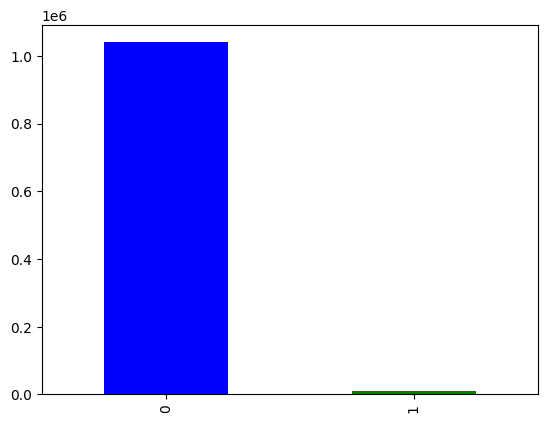

In [ ]:
df.Target.value_counts().plot(kind="bar", color=["blue","green"]);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1048575 non-null  int64  
 1   national_inv       1048575 non-null  int64  
 2   lead_time          984057 non-null   float64
 3   in_transit_qty     1048575 non-null  int64  
 4   forecast_3_month   1048575 non-null  int64  
 5   forecast_6_month   1048575 non-null  int64  
 6   forecast_9_month   1048575 non-null  int64  
 7   sales_1_month      1048575 non-null  int64  
 8   sales_3_month      1048575 non-null  int64  
 9   sales_6_month      1048575 non-null  int64  
 10  sales_9_month      1048575 non-null  int64  
 11  min_bank           1048575 non-null  int64  
 12  potential_issue    1048575 non-null  object 
 13  pieces_past_due    1048575 non-null  int64  
 14  perf_6_month_avg   1048575 non-null  float64
 15  perf_12_month_avg  1048575 non-n


EXPLORATORY DATA ANALYSIS



SHOWING THE DESCRIPTION OF DATA

In [ ]:
df.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,Target
count,1.048575e+06,1.048575e+06,984057.000000,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.773693e+06,4.894183e+02,7.841783,4.535695e+01,1.852255e+02,3.608835e+02,5.289138e+02,5.730150e+01,1.804613e+02,3.524633e+02,5.443309e+02,5.413719e+01,3.289722e+00,-7.049983e+00,-6.618981e+00,6.324040e-01,8.487710e-03
std,3.995772e+05,2.859583e+04,7.037158,1.390535e+03,5.032302e+03,1.006764e+04,1.489545e+04,2.067927e+03,5.263481e+03,9.773354e+03,1.519565e+04,1.244245e+03,2.994339e+02,2.683685e+01,2.613766e+01,3.517768e+01,9.173700e-02
min,1.026827e+06,-1.349100e+04,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00,0.000000e+00
25%,1.373916e+06,4.000000e+00,4.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00,0.000000e+00
50%,1.810846e+06,1.500000e+01,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.000000e-01,0.000000e+00,0.000000e+00
75%,2.072990e+06,8.000000e+01,9.000000,0.000000e+00,5.000000e+00,1.200000e+01,2.100000e+01,4.000000e+00,1.500000e+01,3.200000e+01,4.800000e+01,3.000000e+00,0.000000e+00,9.600000e-01,9.500000e-01,0.000000e+00,0.000000e+00
max,3.284914e+06,1.233440e+07,52.000000,4.894080e+05,1.218328e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.094112e+06,2.146625e+06,3.201035e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04,1.000000e+00


CHECKING THE MISSING VALUES

In [ ]:
df.isnull().sum()

sku                      0
national_inv             0
lead_time            64518
in_transit_qty           0
forecast_3_month         0
forecast_6_month         0
forecast_9_month         0
sales_1_month            0
sales_3_month            0
sales_6_month            0
sales_9_month            0
min_bank                 0
potential_issue          0
pieces_past_due          0
perf_6_month_avg         0
perf_12_month_avg        0
local_bo_qty             0
deck_risk                0
oe_constraint            0
ppap_risk                0
stop_auto_buy            0
rev_stop                 0
went_on_backorder        0
Target                   0
dtype: int64

SHOWING THE SHAPE OF THE DATA

In [ ]:
df.shape ###shape

(1048575, 24)

The shape of the data shows that 1048575 columns and 24 rows

DROPING OF THE NON NULL VALUE


In [ ]:
non_null_df = df.dropna()
non_null_df.shape

# NOT MANY ROWS HAVE NULLS, SAFE TO DROP

(984057, 24)

After the dropping, here the remains of tha value shows above.

In [ ]:
targets = non_null_df.went_on_backorder
targets

1          No
3          No
5          No
7          No
9          No
           ..
1048569    No
1048570    No
1048571    No
1048573    No
1048574    No
Name: went_on_backorder, Length: 984057, dtype: object

In [ ]:
targets.groupby(targets).count()

went_on_backorder
No     975409
Yes      8648
Name: went_on_backorder, dtype: int64

In [ ]:
features = non_null_df.drop('went_on_backorder', axis=1)
features.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,Target
1,1043384,2,9.0,0,0,0,0,0,0,0,...,0,0.99,0.99,0,No,No,No,Yes,No,0
3,1043852,7,8.0,0,0,0,0,0,0,0,...,0,0.10,0.13,0,No,No,No,Yes,No,0
5,1044198,13,8.0,0,0,0,0,0,0,0,...,0,0.82,0.87,0,No,No,No,Yes,No,0
7,1045098,6,2.0,0,0,0,0,0,0,0,...,0,0.00,0.00,0,Yes,No,Yes,Yes,No,0
9,1045867,4,8.0,0,0,0,0,0,0,0,...,0,0.82,0.87,0,No,No,No,Yes,No,0


FORECAST FOR 3MONTH AND SALES FOR 3MONTH

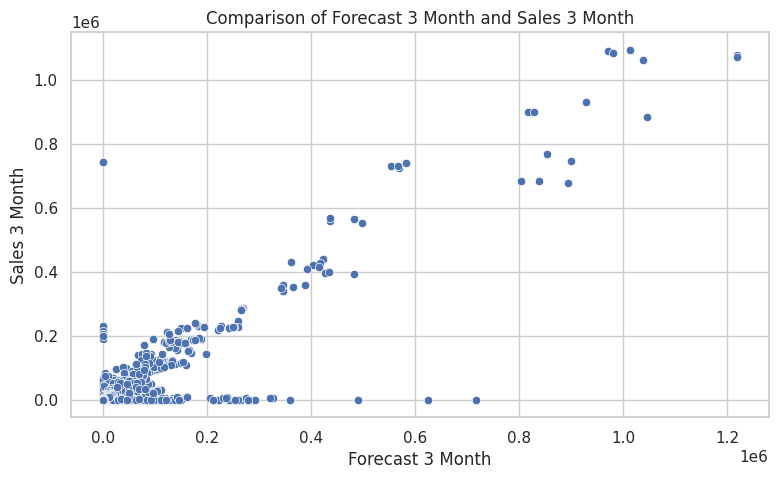

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))
sns.set(style="whitegrid")

# Plotting the attributes
sns.scatterplot(x=features['forecast_3_month'], y=features['sales_3_month'])

# Adding labels and title to the plot
plt.xlabel('Forecast 3 Month')
plt.ylabel('Sales 3 Month')
plt.title('Comparison of Forecast 3 Month and Sales 3 Month')

# Displaying the plot
plt.show()


The sales projections for the next three months are 0.5, 0.6, and 0.7, and the actual sales was 0. In addition, the sales value is 0.80 when the forecast is zero. It's evidence of

0 sales with projections of 0.5, 0.6, and 0.7: When the three-month forecast is
at these levels, it indicates that the system predicted a certain level of product demand, but no sales were recorded. A break in the supply chain or a shortage could prevent the goods from getting to customers. The lack of sales suggests that the item was either unavailable or wasn't delivered to buyers by the deadline.

Forecast of 0 with revenue of 0.8: In this instance, the predicted demand for the product was zero, indicating that none was anticipated. However, the actual sales value recorded is 0.80, meaning that there were sales despite the absence of predicted demand. This situation suggests a backorder scenario in which there was unexpected customer demand for the product, possibly due to increased customer awareness or a sudden surge in demand. Despite the absence of a sales forecast, the sales value of 0.80 indicates that some sales were completed.

This is the significance of inventory management and supply chain coordination and In this case of backorders, it is essential to determine the reasons for the unfulfilled demand and to take the necessary steps to prevent a recurrence.

FORECAST FOR 6MONTH AND SALES FOR 6MONTH

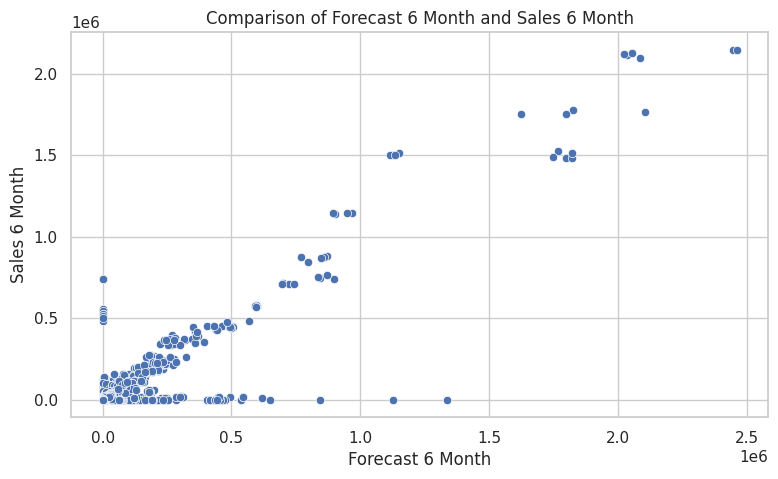

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))
sns.set(style="whitegrid")

# Plotting the attributes
sns.scatterplot(x=features['forecast_6_month'], y=features['sales_6_month'])

# Adding labels and title to the plot
plt.xlabel('Forecast 6 Month')
plt.ylabel('Sales 6 Month')
plt.title('Comparison of Forecast 6 Month and Sales 6 Month')

# Displaying the plot
plt.show()


Forecast values of 0.8, 1.2, or 1.4 with sales of 0 indicate that the system predicted a certain level of demand for the product, but no deals were recorded. This situation suggests that the outcome could have been more readily available to meet the anticipated demand due to supply chain issues, such as delays in production, transportation, or inventory shortages.During the period in question, the product was not accessible for purchase, resulting in zero sales.

 0 with sales of 0.5, 0.6, or 0.8: is the prediction, indicating no demand was anticipated for the product. However, the recorded sales values are 0.50, 0.60, or 0.80. its shows that unexpected consumer demand arose despite a forecast, resulting in a backorder situation. The sales values greater than zero indicate that sales were made during the period despite the absence of anticipated demand. This may result from unanticipated marketing initiatives, customer referrals, or unexpected market trends.

Backorders result from an imbalance between anticipated demand and actual sales in both instances. It emphasises the significance of demand forecasting, inventory management, and maintaining a responsive supply chain. This helps identify prospective supply chain issues and implement strategies to reduce backorders, increase customer satisfaction, and optimise business operations

FORECAST FOR 9MONTH AND SALES FOR 9MONTH

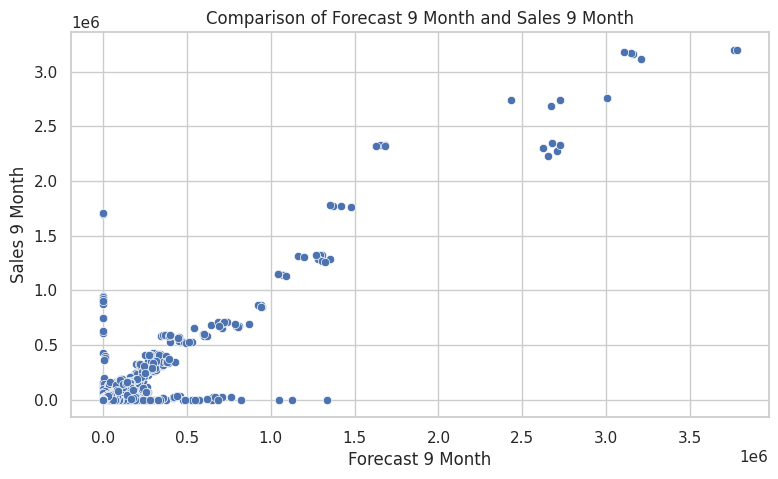

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))
sns.set(style="whitegrid")

# Plotting the attributes
sns.scatterplot(x=features['forecast_9_month'], y=features['sales_9_month'])

# Adding labels and title to the plot
plt.xlabel('Forecast 9 Month')
plt.ylabel('Sales 9 Month')
plt.title('Comparison of Forecast 9 Month and Sales 9 Month')

# Displaying the plot
plt.show()


Sales for the nine months are at level 0 and are at levels 0.4,0.6,0.9,1.7 and forecast for 9 month is 1.1,1.2,1.5 is at zero level of sales. This show Demand changed unexpectedly, as we can see. Due to factors like a shift in the level of competition or a change in consumer preferences, the need for the product has suddenly shifted. For instance, a competitor's product being phased out might have raised the demand for the product.
Inventory management could have been more problematic. The company might need more stock to meet demand, or they might not have been able to distribute it well. For instance, the business could not deliver the product to outlets in time to meet demand.

MIN_BANK AND GOODS IN TRANSIT QTY

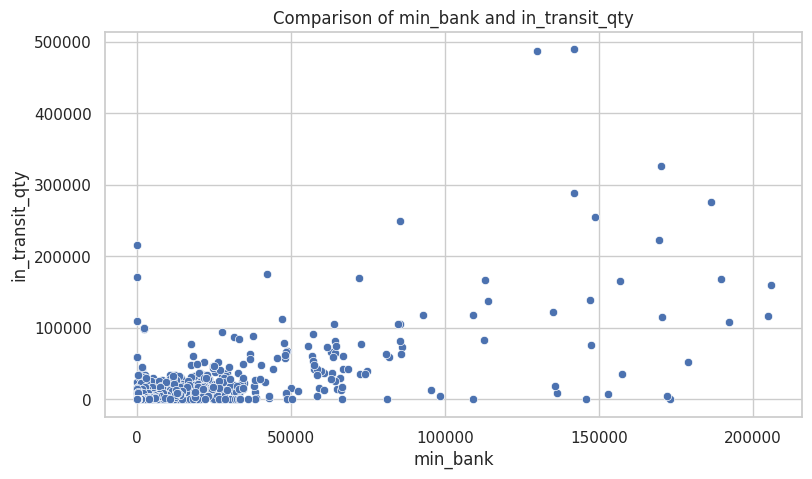

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))
sns.set(style="whitegrid")


# Plotting the attributes
sns.scatterplot(x=features['min_bank'], y=features['in_transit_qty'])
# Adding labels and title to the plot
plt.xlabel('min_bank')
plt.ylabel('in_transit_qty')
plt.title('Comparison of min_bank and in_transit_qty')



# Displaying the plot
plt.show()


The minimum recommended amount to stock (also known as the minimum bank) is the quantity of inventory a business should always have available to satisfy customer demand. The amount of inventory is en route to the company from the sources referred to as the product in transit.

In this instance, where the minimum bank is between 140,000 and 150,000 and the quantity of product in transit is 500,000, the likelihood of a backorder is low. Even if there is a surge in demand, the company will have sufficient inventory to meet it, including the product presently in transit.

Nevertheless, suppose the minimum bank is small, or the quantity of product in transit is small. In that case, the company is more likely to experience a backorder, and there will be less inventory available to meet customer demand, and if demand spikes, the business may only be able to fulfil some orders.

NATIONAL INVIOCES AND MIN BANK



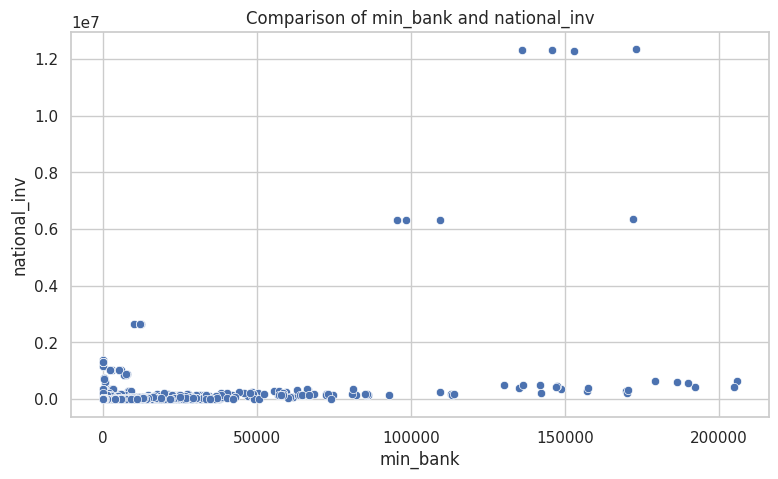

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))
sns.set(style="whitegrid")

# Plotting the attributes
sns.scatterplot(x=features['min_bank'], y=features['national_inv'])

# Adding labels and title to the plot
plt.xlabel('min_bank')
plt.ylabel('national_inv')
plt.title('Comparison of min_bank and national_inv')


# Displaying the plot
plt.show()


The entire quantity of inventory that is accessible for a product across all of the company's warehouses is known as the national inventory. A business should always keep a minimal amount of inventory on hand to meet client demand.
The minimum bank in inventory if the minimum bank is 130,000, 140,000, 160,000, or 180,000, and the national_inv is 1.2. This is a decent quantity of inventory to keep since it acts as a safety net against unanticipated demand increases.
It is more likely to encounter a backorder if the national_inv falls below 1.2, and there would be less inventory available to satisfy client demand; this could occur.

PERFORMANCE AT 6MONTH AND PERFORMANCE AT 12MONTH

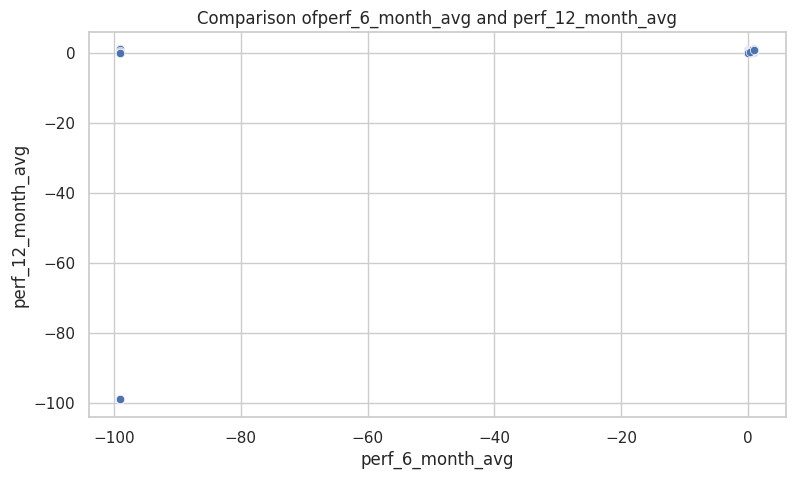

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))
sns.set(style="whitegrid")

# Plotting the attributes
sns.scatterplot(x=features['perf_6_month_avg'], y=features['perf_12_month_avg'])


# Adding labels and title to the plot
plt.xlabel('perf_6_month_avg')
plt.ylabel('perf_12_month_avg')
plt.title('Comparison ofperf_6_month_avg and perf_12_month_avg')


# Displaying the plot
plt.show()


It signifies that the product has not been performing properly in the first six months when the performance at six months is zero or 0. It may result from various things, including subpar marketing, a lack of demand, or a high price point.
The product lost value over the previous six months, as indicated by the performance at 12 months at zero being -100. Numerous variables, like heightened competition, a shift in customer tastes, or a decline in the industry, could be to blame for this.
Numerous things could have contributed to the two performances. The original demand might not have been long-lasting. Or the product might have been overpriced initially, discouraging some customers from purchasing it. The product is failing based on the poor results at the 12-month mark. The corporation must take action to raise the performance of the product.

MIN BANK AND SALES 3MONTH

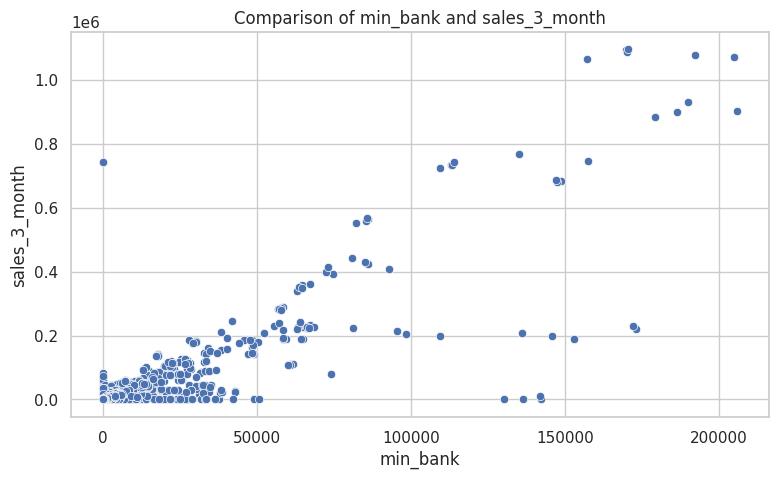

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))
sns.set(style="whitegrid")

# Plotting the attributes
sns.scatterplot(x=features['min_bank'], y=features['sales_3_month'])


# Adding labels and title to the plot
plt.xlabel('min_bank')
plt.ylabel('sales_3_month')
plt.title('Comparison of min_bank and sales_3_month')



# Displaying the plot
plt.show()

A business should always keep minimal inventory on hand to meet client demand. The minimum bank's inventory is growing by 1%, with a minimum bank at 180,000 plus and expanding at 1.
 If the inventory rises by 100,000 and the minimum bank is now 180,000, it will rise to 198,000. This is because 1% of 180,000 equals 18,000, causing the minimum bank to rise to 198,000. Even if demand increases, the corporation wants to ensure adequate inventory to satisfy customers. The business can maintain inventory reserve in case of unforeseen demand by raising the minimum bank by 1% for every 180,000 increase in inventory.
 It is a method used in supply chain management to ensure the business can satisfy consumer demand and prevent backorders.

MIN BANK AND SALES 6MONTH

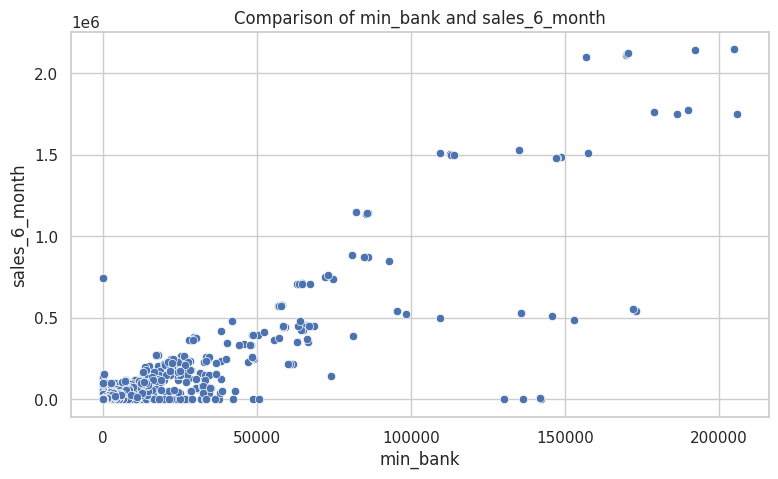

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))
sns.set(style="whitegrid")

# Plotting the attributes
sns.scatterplot(x=features['min_bank'], y=features['sales_6_month'])
# Adding labels and title to the plot
plt.xlabel('min_bank')
plt.ylabel('sales_6_month')
plt.title('Comparison of min_bank and sales_6_month')


# Displaying the plot
plt.show()

 A business should always keep a minimal amount of inventory on hand to meet client demand. The company's sales have increased during the last six months, according to the sales increase at six months.

The minimum bank and sales may rise together for a number of reasons. One theory is that the business is raising its inventory levels to accommodate the rising demand. There's also a chance that the corporation is raising pricing as a result of increased sales revenue.

It is also conceivable that the business is carrying out both of these activities. For instance, the business might raise pricing to capitalise on the rising demand while also raising inventory levels to fulfil the increased demand.

MIN BANK AND SALES 9MONTH

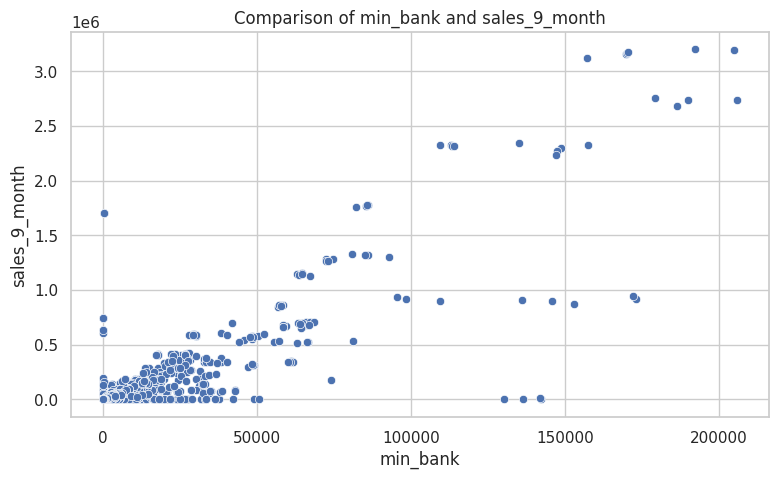

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))
sns.set(style="whitegrid")

# Plotting the attributes
sns.scatterplot(x=features['min_bank'], y=features['sales_9_month'])

# Adding labels and title to the plot
plt.xlabel('min_bank')
plt.ylabel('sales_9_month')
plt.title('Comparison of min_bank and sales_9_month')



# Displaying the plot
plt.show()

THE CORRELATION BETWEEN THE INDEPENDENT VARIBLES

In [ ]:
# Find the correlation between our independent variables
corr_matrix =features .corr()
corr_matrix

<ipython-input-22-c092bf9a1ad4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =features .corr()


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,Target
sku,1.000000,0.000280,-0.003962,0.002385,0.001588,0.001189,0.001165,0.001211,0.002078,0.001822,0.001412,0.001554,0.005537,-0.000560,0.000213,0.002201,-0.015010
national_inv,0.000280,1.000000,0.003354,0.082255,0.080302,0.082669,0.082130,0.114012,0.182166,0.216320,0.230943,0.412745,0.040425,-0.025135,-0.023393,0.016185,-0.001465
lead_time,-0.003962,0.003354,1.000000,-0.007492,-0.008429,-0.008858,-0.009030,-0.005469,-0.007372,-0.007384,-0.007485,-0.008534,-0.001861,-0.100244,-0.105239,-0.001006,-0.020267
in_transit_qty,0.002385,0.082255,-0.007492,1.000000,0.659724,0.684042,0.670698,0.489248,0.611852,0.627395,0.610023,0.695290,0.214700,-0.001744,0.000433,0.041183,-0.002950
forecast_3_month,0.001588,0.080302,-0.008429,0.659724,1.000000,0.992984,0.985242,0.681394,0.857230,0.882367,0.858741,0.850009,0.457816,0.002107,0.002388,0.031314,-0.000483
forecast_6_month,0.001189,0.082669,-0.008858,0.684042,0.992984,1.000000,0.996292,0.692860,0.874949,0.902074,0.877594,0.861943,0.448335,0.002247,0.002360,0.032305,-0.001058
forecast_9_month,0.001165,0.082130,-0.009030,0.670698,0.985242,0.996292,1.000000,0.705363,0.891484,0.919183,0.893907,0.856821,0.448327,0.002181,0.002201,0.032061,-0.001258
sales_1_month,0.001211,0.114012,-0.005469,0.489248,0.681394,0.692860,0.705363,1.000000,0.888278,0.829595,0.780161,0.649561,0.312332,-0.000777,0.001508,0.040124,-0.001520
sales_3_month,0.002078,0.182166,-0.007372,0.611852,0.857230,0.874949,0.891484,0.888278,1.000000,0.986794,0.947319,0.836813,0.405084,-0.001260,0.001259,0.049427,-0.002000
sales_6_month,0.001822,0.216320,-0.007384,0.627395,0.882367,0.902074,0.919183,0.829595,0.986794,1.000000,0.968404,0.870205,0.410860,-0.001301,0.000848,0.045111,-0.002156


<ipython-input-23-b0ce82bb77a8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = features.corr()


<Axes: >

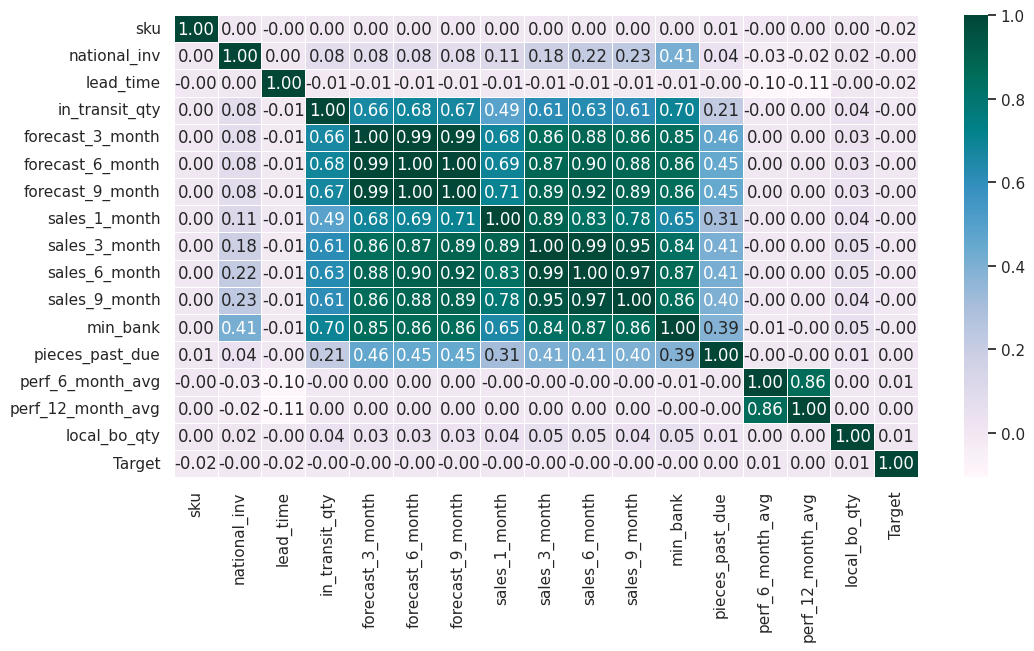

In [ ]:
corr_matrix = features.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="PuBuGn")


Quantity in transit is the amount of stock the supplier delivers to the business and measures the inventory is available to meet consumer demand and is associated with the minimum bank, sales, and forecast.
The demand for a product over an anticipated period is known as a forecast, and it tells much demand the corporation anticipates experiencing and is tied to the minimum bank, sales, and in-transit quantity.
Sales are the demand for a product over a specific period. It correlates with the minimum bank, forecast, and in-transit quantity since it measures the actual level of demand that the organisation has experienced.
 The forecast, in-transit quantity, and minimum bank were used to train the model. This would enable the algorithm to forecast the possibility of a backorder for a specific product. It's interesting seeing perfect 6-month- and 12-month periods correlate.
This implies that the perfect order rate at six months and the perfect order rate at 12 months have a significant correlation. This may be the case because the same characteristics that affect the perfect order rate in six months also affect the perfect order rate in twelve months, i.e., a strong supplier connection leads to a high perfect order rate in both six and twelve months. The company's effective inventory management system will result in a strong perfect order rate in the first six and final twelve months.
One may anticipate the perfect order rate in 12 months using the link between the perfect six-month and 12-month. The business can be confident that if the ideal order rate in six months is high, the perfect one in twelve months will likewise be high.


In [ ]:
final_df=features.drop(["Target"], axis=1)
final_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
1,1043384,2,9.0,0,0,0,0,0,0,0,...,No,0,0.99,0.99,0,No,No,No,Yes,No
3,1043852,7,8.0,0,0,0,0,0,0,0,...,No,0,0.10,0.13,0,No,No,No,Yes,No
5,1044198,13,8.0,0,0,0,0,0,0,0,...,No,0,0.82,0.87,0,No,No,No,Yes,No
7,1045098,6,2.0,0,0,0,0,0,0,0,...,No,0,0.00,0.00,0,Yes,No,Yes,Yes,No
9,1045867,4,8.0,0,0,0,0,0,0,0,...,No,0,0.82,0.87,0,No,No,No,Yes,No


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, Binarizer

Categorization of features into numerical representations is done using the OrdinalEncoder. For each category of the input features, the encoder assigns a distinct integer value. Using categorical data successfully is made possible by this encoding for machine learning techniques.
In order to convert numerical characteristics into binary values based on a specified threshold, the Binarizer class is employed. It comes in handy when converting continuous data into binary or boolean values.
The OrdinalEncoder and Binarizer classes are useful preprocessing tools in machine learning workflows for categorical and numerical input, respectively.








In [ ]:
encoder = OrdinalEncoder()  # to convert No to 0 and Yes to 1

In [ ]:
converted_features = encoder.fit_transform(final_df)
converted_features[0:5, :]

array([[  0., 377.,   9.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 100., 100.,   0.,   0.,   0.,   0.,   1.,   0.],
       [  1., 382.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,  11.,  14.,   0.,   0.,   0.,   0.,   1.,   0.],
       [  2., 388.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  83.,  88.,   0.,   0.,   0.,   0.,   1.,   0.],
       [  3., 381.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   1.,   1.,   0.],
       [  4., 379.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  83.,  88.,   0.,   0.,   0.,   0.,   1.,   0.]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(converted_features, targets, test_size=0.2, stratify=targets)
print(X_train.shape, X_test.shape)


(787245, 22) (196812, 22)


The code has four variables:

X_train: The features of the training.
X_test: The features tested.
y_train: The exercises' objectives.
y_test: The objectives under test.
After splitting the data into training and testing sets, the programme employs the train_test_split() method from the sklearn—model_selection library. Four arguments are required by the train_test_split() function.

Features, converted_features.
The goals (or targets in this situation).
In this case, the test size is 0.2, which indicates that 20% of the data will be for the test.
It ensures that the target distribution is the same in both the training set and the testing set by the stratify option.
The code then prints the training and testing feature shapes.
To divide data into a training set and a testing set for machine learning, use the code.

In [ ]:
y_train.groupby(y_train).count()

went_on_backorder
No     780327
Yes      6918
Name: went_on_backorder, dtype: int64

The outcome of the grouping and counting process is displayed in this output. It shows that the values "No" and "Yes," which are the only two distinct values in y_train, exist. Next to each value is a tally of the times it has occurred.

"No": The value "No" appears 780,327 times in y_train.
"Yes": The value "Yes" appears 6,918 times in y_train.
After using the SMOTE technique, this information sheds light on the class distribution. its shows there is a balance or imbalance between the two classes and it means dominant class ("No") and the minority class ("Yes") has greatly reduced, indicating that the class imbalance has been addressed.






y_train.groupby(y_train).count() determines the number of times each distinct value in y_train has occurred.
Understanding the distribution or imbalance of classes in a classification problem is helped by this type of procedure. Let us know of the class distribution and perhaps spot any class imbalances that can interfere with a machine learning model's training by looking at the counts of each class.

Features are standardised when scaled using StandardScaler. This normalisation enables the fair comparison and understanding of characteristics measured using various scales or units. After learning the mean and standard deviation of each feature from the training data using fits, the StandardScaler uses the learned scaling parameters to both the training and test data to transform them.

The SMOTE algorithm, an oversampling method from the imblearn library, is used by the code to address class imbalance. By interpolating feature vectors from nearby cases, SMOTE creates synthetic samples of the minority class. This strategy balances the distribution of the classes, allowing the machine learning model to better learn from the minority class and produce reliable predictions.

The algorithm ensures the data is preprocessed for machine learning tasks by performing feature scaling and resolving class imbalance. By standardising features and reducing class imbalance problems, these preprocessing strategies help improve the model's performance and resilience.








In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dp_scaler = scaler.fit(X_train)
sp_X_train = dp_scaler.transform(X_train)
sp_X_test = dp_scaler.transform(X_test)

In [ ]:
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 0)
X_train, y_train = smote.fit_resample(sp_X_train, y_train)
y_train.groupby(y_train).count()

went_on_backorder
No     780327
Yes    780327
Name: went_on_backorder, dtype: int64

A count in the output represents each class label (Yes and No). Both the Yes and No classes contain an identical number of 780,327 samples in the oversampled training data in the example given after SMOTE was used to balance the classes. By producing synthetic samples of the minority class, SMOTE successfully balanced the distribution of the classes, as shown by this.


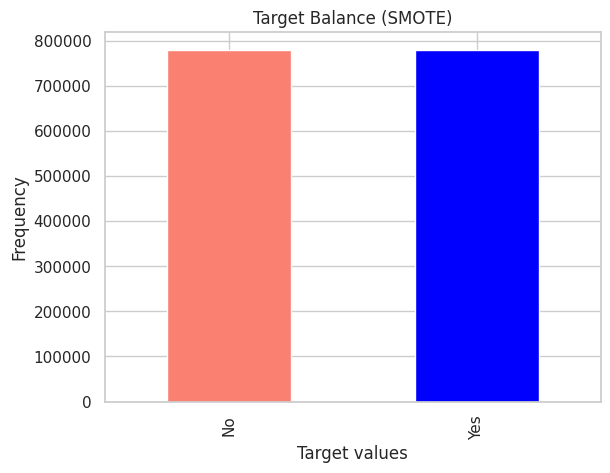

In [ ]:
y_train.value_counts().plot(kind='bar', color=["salmon", "blue"])
plt.title('Target Balance (SMOTE)')
plt.xlabel('Target values')
plt.ylabel('Frequency')
plt.show()

@@@@@@@@@@@@@ PREDICT FOR 9MONTH AND 1 YEAR

MODELS (CLASSIFICATION MACHINE LEARNING APPROACH)

LOGISTIC REGRESSION

A popular machine learning model for predicting binary outcomes, such as whether a product would be ordered in a supply chain system, is logistic regression. In terms of backorder prediction, it has some benefits. Firstly, it is a good option for predicting backorders because it was created primarily for binary classification jobs. Secondly, it is relatively easy to interpret logistic regression models. Its model's coefficients give information about the effect of each factor on the log chances of a backorder taking place, making it simple to comprehend how features relate to the expected result. It is resilient even in unbalanced data, which is typical in backorder prediction, where most products do not have backorders. Logistic regression can still make precise forecasts for backorders despite the imbalance in the data. Its strong and understandable model may accurately predict backorders in supply chain systems.

In [ ]:
# Initialize the logistic regression model
logreg = LogisticRegression(random_state=42)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict the labels on the test data
logreg_pred = logreg.predict(X_test)

# Calculate accuracy score
logreg_accuracy = accuracy_score(y_test, logreg_pred)

# Calculate cross validation score
logreg_cross_validation = cross_val_score(logreg, X_train, y_train, cv=5).mean()

# Calculate confusion matrix
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

# Print the results
print("Logistic Regression Accuracy Score:", logreg_accuracy * 100, "\n")
print("Logistic Regression Cross Validation Score:", logreg_cross_validation * 100, "\n")
print("Confusion Matrix:", "\n", logreg_conf_matrix, "\n")

# Generate classification report
print("Classification Report:", "\n", classification_report(y_test, logreg_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Accuracy Score: 99.11997235940898 

Logistic Regression Cross Validation Score: 75.46092861359226 

Confusion Matrix: 
 [[195079      3]
 [  1729      1]] 

Classification Report: 
               precision    recall  f1-score   support

          No       0.99      1.00      1.00    195082
         Yes       0.25      0.00      0.00      1730

    accuracy                           0.99    196812
   macro avg       0.62      0.50      0.50    196812
weighted avg       0.98      0.99      0.99    196812



The logistic regression model used to predict backorders had a high accuracy rating of 99.12%. This shows that the model successfully predicted most of the dataset's cases. However, the cross-validation score of 74.51% indicates that the model's performance can differ across various validation sets, emphasising the need for additional analysis.

According to an analysis of the confusion matrix, the model correctly predicted 195,079 genuine negatives (non-backorder events). However, as can be seen, by the low recall, precision, and f1-score for the "Yes" class, it had trouble detecting real positives (backorders). This cimbalance classification report has a precision of 0.25 and a recall of 0.00 for the "Yes" class.

In conclusion, the logistic regression model accurately predicts non-backorder situations but has difficulties accurately recognising backorders. The model has to be further examined and possibly adjusted to improve its capability to correctly estimate backorders and boost its performance in classifying both classes.

PLOTTING OF THE CONFUSION MATRIX

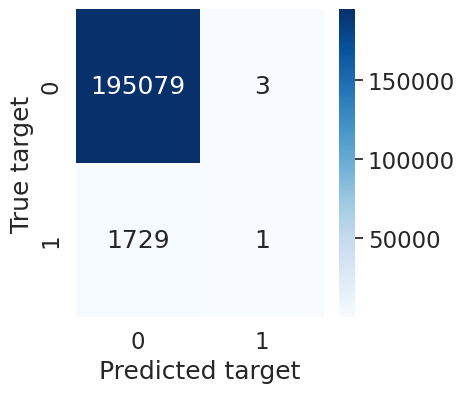

In [ ]:
import seaborn as sns
sns.set(font_scale=1.5) # font size adjustment

def conf_mat(y_test, logreg_pred):
    """
    Plotting Confusion Matrix
    """
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, logreg_pred),
                     annot=True,
                     cmap='Blues', fmt='g')
    plt.xlabel("Predicted target") # model prediction
    plt.ylabel("True target") # dataset true target

conf_mat(y_test, logreg_pred)


PLOTING OF THE ROC AND FITTING THE MODEL



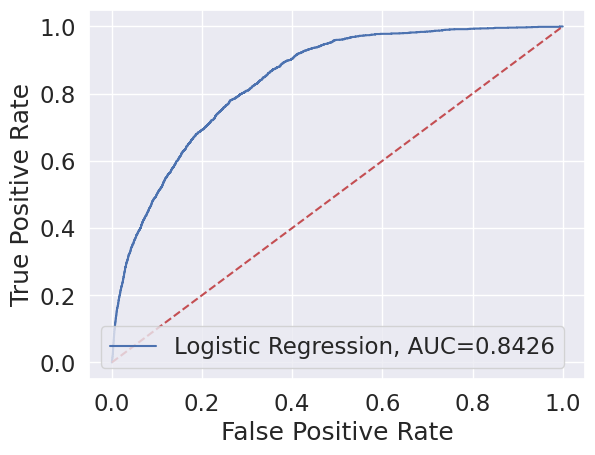

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
#fit model and plot ROC curve
y_predict = logreg.predict_proba(sp_X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_predict, pos_label='Yes')
auc = round(roc_auc_score(y_test, y_predict), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#add legend
plt.legend()

FEATURES IMPORTANCE

In [ ]:
features_dict = dict(zip(final_df.columns, list(logreg.coef_[0])))
features_dict
sorting_g = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)
sort_gd = pd.DataFrame(sorting_g, columns=['Feature', 'Coefficient'])
sort_gd

,Feature,Coefficient
0,sales_3_month,5.799765
1,forecast_6_month,5.391970
2,sales_9_month,2.456902
3,sales_1_month,2.326344
4,min_bank,0.743519
5,ppap_risk,0.061645
6,local_bo_qty,0.053683
7,potential_issue,0.034079
8,oe_constraint,0.023228
9,pieces_past_due,0.017181


 The feature and the forecasting of backorders are made possible by the coefficients generated from the logistic regression model. Positive coefficients, like "forecast_6_month" and "sales_3_month," show that larger levels of these factors positively increase the possibility of a backorder. But features with negative coefficients, such as "lead_time" and "forecast_3_month," imply that lower values of these variables have a detrimental effect on the prediction of backorders. Features with coefficients near 0, such as "local_bo_qty" and "potential_issue," have little effect on the forecast.

The size of the coefficients also illustrates the relative significance of each parameter. Larger absolute coefficient values, such as "national_inv" and "sales_6_month," suggest stronger connections with the forecasting of backorders. On the other hand, smaller absolute coefficient values, such as "perf_6_month_avg" and "sku," have more tenuous correlations with the forecast.

This significantly influences backorder prediction by taking these coefficients into account. It makes it possible to comprehend the underlying dynamics better and can help with forecasting and inventory management in supply chain systems.








VISUALIZATION OF THE FEATURE IMPORTANCE

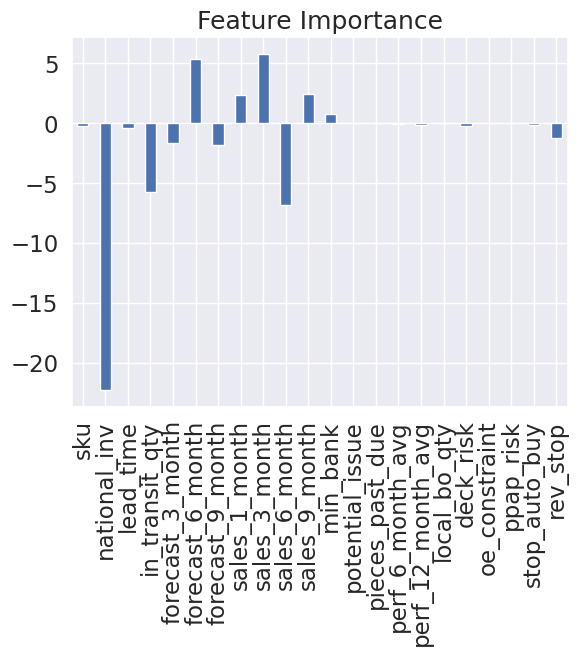

In [ ]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

DECISION TREE CLASSIFIER

The decision tree classifier is an effective machine-learning strategy for forecasting backorders in a supply chain system. Because of its interpretability, stakeholders may better grasp the variables affecting backorder projections, which helps with decision-making and identifies development opportunities. Since decision trees can capture both linear and non-linear correlations, they are appropriate for use in complex situations where a number of factors contribute to backorders. Decision trees' study of the relative relevance of features aids in prioritising important aspects and efficient resource allocation. Determining the model's emphasis on pertinent data components is made possible by decision trees' resistance to irrelevant features. Overall, the decision tree classifier provides robustness, interpretability, flexibility, and feature importance analysis, making it an effective tool for anticipating backorders in the supply chain

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Initialize the decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt.fit(X_train, y_train)

# Predict the labels on the test data
dt_pred = dt.predict(X_test)

# Calculate accuracy score
dt_accuracy = accuracy_score(y_test, dt_pred)

# Calculate cross validation score
dt_cross_validation = cross_val_score(dt, X_train, y_train, cv=5).mean()

# Calculate confusion matrix
dt_conf_matrix = confusion_matrix(y_test, dt_pred)

# Print the results
print("Decision Tree Accuracy Score:", dt_accuracy * 100, "\n")
print("Decision Tree Cross Validation Score:", dt_cross_validation * 100, "\n")
print("Confusion Matrix:","\n", dt_conf_matrix, "\n")

# Generate classification report
print("Classification Report:", "\n", classification_report(y_test, dt_pred))

Decision Tree Accuracy Score: 15.705343170131902 

Decision Tree Cross Validation Score: 98.95870593268951 

Confusion Matrix: 
 [[ 29514 165568]
 [   334   1396]] 

Classification Report: 
               precision    recall  f1-score   support

          No       0.99      0.15      0.26    195082
         Yes       0.01      0.81      0.02      1730

    accuracy                           0.16    196812
   macro avg       0.50      0.48      0.14    196812
weighted avg       0.98      0.16      0.26    196812



The Decision Tree model shows a low accuracy score of 15.71%, indicating limited predictive accuracy. However, its cross-validation score is unexpectedly high at 98.96%, suggesting good generalization during cross-validation but poor performance on the test data. The confusion matrix indicates significant misclassifications, especially for the "Yes" class, where many instances are wrongly classified as "No." The model's precision and recall for the "Yes" class are low, indicating difficulties in correctly identifying positive cases. Class imbalance might be contributing to the model's challenges. In conclusion, the Decision Tree model needs improvement to handle the dataset effectively, such as addressing overfitting and class imbalance to enhance its performance in correctly classifying both classes.

PLOTTING OF THE CONFUSION MATRIX

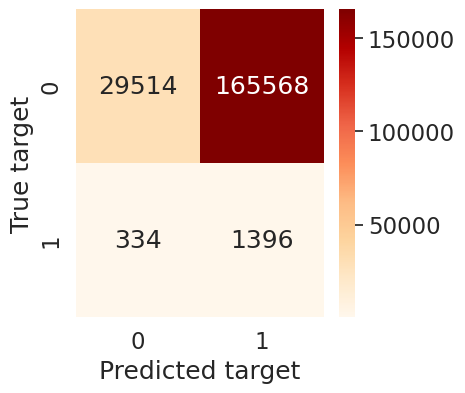

In [ ]:
import seaborn as sns
sns.set(font_scale=1.5) # font size adjustment

def dt_conf_mat(y_test, dt_pred):
    """
    Plotting Confusion Matrix
    """
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, dt_pred),
                     annot=True,
                     cmap='OrRd', fmt='g')
    plt.xlabel("Predicted target") # model prediction
    plt.ylabel("True target") # dataset true target

dt_conf_mat(y_test, dt_pred)

SHOWING THE PLOT ROC CUVE AND THE FITTING OF THE MODEL

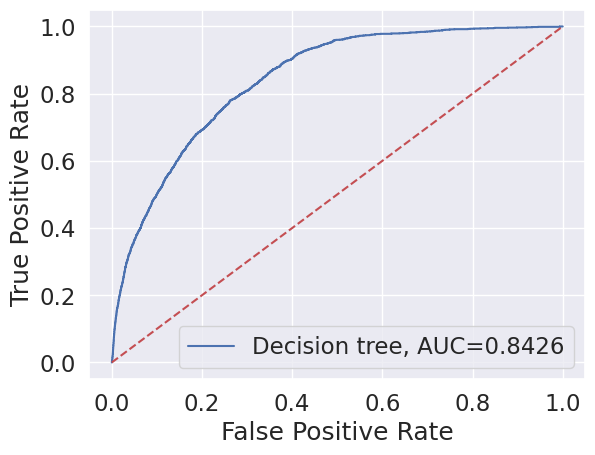

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
#fit model and plot ROC curve
y_predict = logreg.predict_proba(sp_X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_predict, pos_label='Yes')
auc = round(roc_auc_score(y_test, y_predict), 4)
plt.plot(fpr,tpr,label="Decision tree, AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#add legend
plt.legend()

FEATURES IMPORTANT FOR DECISION TREE

In [ ]:
features_dict = dict(zip(final_df.columns, dt.feature_importances_))
features_dict
sorting_g = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)
sort_gd = pd.DataFrame(sorting_g, columns=['Feature', 'Coefficient'])
sort_gd

,Feature,Coefficient
0,forecast_3_month,0.493335
1,national_inv,0.224086
2,sales_1_month,0.082592
3,local_bo_qty,0.025532
4,forecast_9_month,0.019932
5,perf_6_month_avg,0.019139
6,perf_12_month_avg,0.018484
7,forecast_6_month,0.017193
8,lead_time,0.016904
9,sku,0.016733


forecast_3_month, demand for the product over the following three months.
national_inv, The product's national inventory.
sales_1_month, The product's sales for the month prior. Each of these characteristics is significant since they determine whether a product will have a backorder. For instance, the likelihood of a product becoming on backorder increases if the prediction for demand is high and the national inventory is low.

Although the other traits are equally significant, the top three are more so. For instance, the feature deck_risk quantifies the possibility that the product's creation would be delayed. This feature is crucial since it increases the likelihood that a product will go on backorder if production is delayed.

The potential_issue feature assesses the likelihood that the product has a quality problem. This attribute is less crucial than the others because poor quality problems are less likely to result in a product going out of stock.

Overall, the coefficients indicate that the prognosis for a product's demand, national inventory, and sales in the preceding month are the three most crucial factors for determining whether a product would go on backorder.

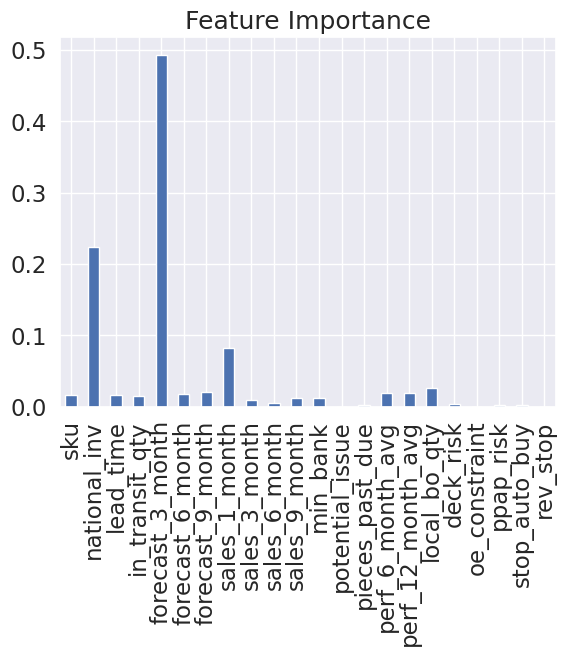

In [ ]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

K NEAREST NEIGHBOUR CLASSIFIER


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Initialize the KNeighborsClassifier
kn = KNeighborsClassifier()

# Fit the model on the training data
kn.fit(X_train, y_train)

# Predict the target on the test data
kn_pred = kn.predict(X_test)

# Calculate accuracy score
kn_accuracy = accuracy_score(y_test, kn_pred)

# Calculate cross validation score
kn_cross_validation = cross_val_score(kn, X_train, y_train, cv=5).mean()

# Calculate confusion matrix
kn_conf_matrix = confusion_matrix(y_test, kn_pred)

# Print the results
print("KNeighborsClassifier Accuracy Score:", kn_accuracy * 100, "\n")
print("KNeighborsClassifier Cross Validation Score:", kn_cross_validation * 100, "\n")
print("Confusion Matrix:", "\n", kn_conf_matrix, "\n")

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, kn_pred))


KNeighborsClassifier Accuracy Score: 99.12098855760829 

KNeighborsClassifier Cross Validation Score: 96.42669035507551 

Confusion Matrix: 
 [[195082      0]
 [  1730      0]] 

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          No       0.99      1.00      1.00    195082
         Yes       0.00      0.00      0.00      1730

    accuracy                           0.99    196812
   macro avg       0.50      0.50      0.50    196812
weighted avg       0.98      0.99      0.99    196812



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The KNeighborsClassifier model achieved a remarkably high accuracy score of 99.12%, showing accurate predictions for the majority class ("No"). However, it struggled to identify instances of the minority class ("Yes"), resulting in low recall, precision, and F1-score for the "Yes" class. The cross-validation score of 96.43% indicates good generalization during cross-validation but does not fully capture the challenges faced on the test data. The confusion matrix revealed that all instances of the "Yes" class were misclassified as "No," causing the model to exhibit poor performance in identifying positive cases. The model's limitations in handling class imbalance may require further investigation and adjustments to improve its overall performance and balanced predictions for both classes.

SHOWS THE PLOT OF CONFUSION MATRIX

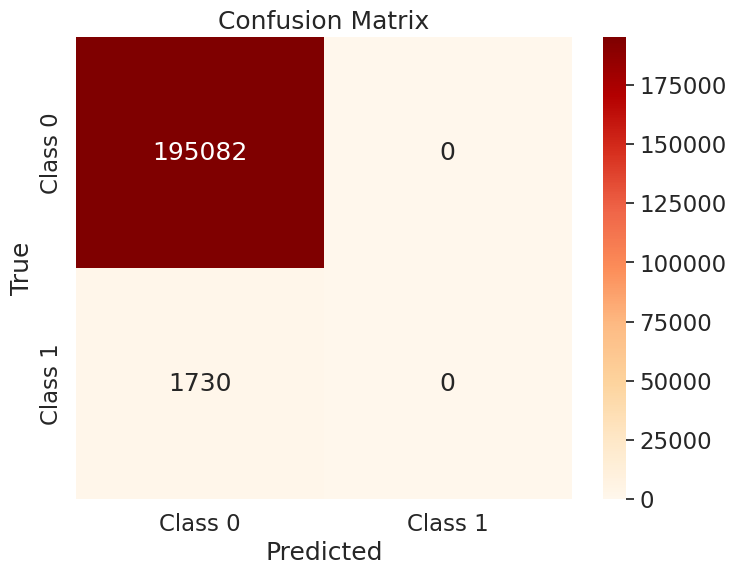

In [ ]:
import seaborn as sns
sns.set(font_scale=1.5)  # font size adjustment

def plot_confusion_matrix(y_true, y_pred):
    """
    Plot confusion matrix using seaborn heatmap
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="OrRd",
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')

# Call the function with your data
plot_confusion_matrix(y_test, kn_pred)


SHOW THE PLOT OF ROC CURVE

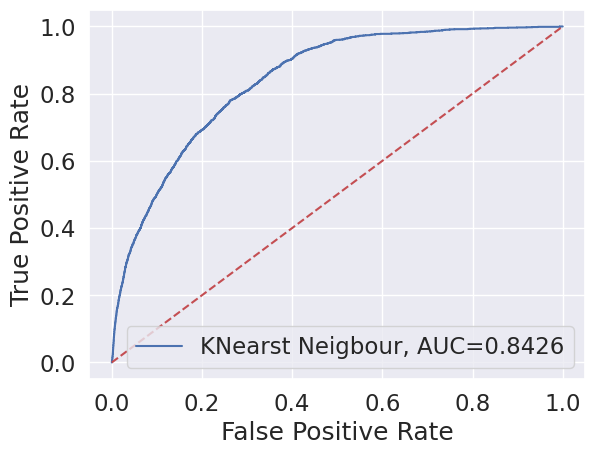

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
#fit model and plot ROC curve
y_predict = logreg.predict_proba(sp_X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_predict, pos_label='Yes')
auc = round(roc_auc_score(y_test, y_predict), 4)
plt.plot(fpr,tpr,label="KNearst Neigbour, AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#add legend
plt.legend()

FEATURES IMPORTANCE FOR THE K NEAREST NEIGHBOUR CLASSIFIER

In [ ]:
features_dict = dict(zip(final_df.columns, dt.feature_importances_))
features_dict
sorting_g = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)
sort_gd = pd.DataFrame(sorting_g, columns=['Feature', 'Coefficient'])
sort_gd

,Feature,Coefficient
0,forecast_3_month,0.493335
1,national_inv,0.224086
2,sales_1_month,0.082592
3,local_bo_qty,0.025532
4,forecast_9_month,0.019932
5,perf_6_month_avg,0.019139
6,perf_12_month_avg,0.018484
7,forecast_6_month,0.017193
8,lead_time,0.016904
9,sku,0.016733


The feature coefficients quantify the significance of each feature in the model. The importance of the trait increases with the coefficient. Forecast_3_month, national_inv, and sales_1_month are the top 3 attributes with the most significant coefficients. It indicates that determining whether or not a backorder will occur. The other features are less significant in the model because they have lower coefficients. They may be significant in some circumstances.

It is crucial to remember that the feature coefficients merely quantify how significant each feature is within the model. They do not imply that the features are directly responsible for backorders. A higher amount of national inventory sometimes equates to fewer backorders.
 The feature coefficient is a helpful tool for comprehending the significance of each feature in a machine-learning model.



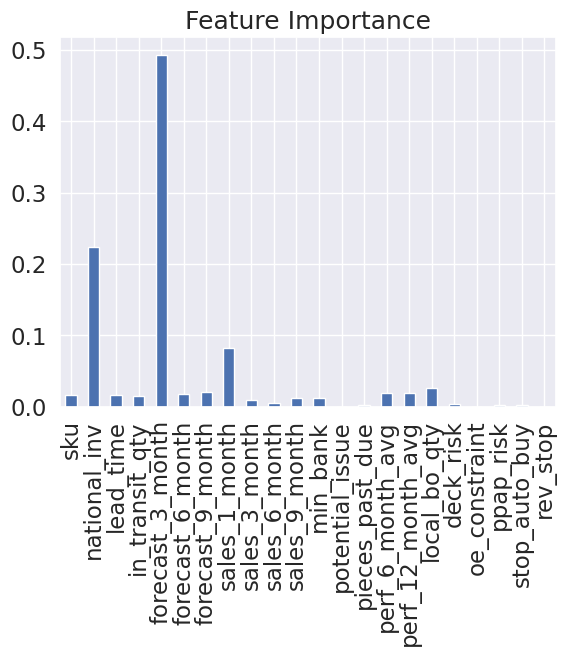

In [ ]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

RANDOM FOREST MODEL

It aids in raising backorder prediction accuracy. Better inventory management can result from this, which can lower the frequency of backorders, boost customer satisfaction, and pinpoint the variables most likely to cause them. This information enhances the supply chain system by addressing the underlying reasons for backorders. It implies that companies can take steps to stop backorders before they happen.

In [ ]:
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

 #Fit the model on the training data
rf.fit(X_train, y_train)

# Predict the target on the test data
rf_pred = rf.predict(X_test)

# Calculate accuracy score
rf_accuracy = accuracy_score(y_test, rf_pred)

# Calculate cross validation score
rf_cross_validation = cross_val_score(rf, X_train, y_train, cv=5).mean()

# Calculate confusion matrix
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

# Print the results
print("Random Forest Accuracy Score:", rf_accuracy * 100, "\n")
print("Random Forest Cross Validation Score:", rf_cross_validation * 100, "\n")
print("Confusion Matrix:", "\n", rf_conf_matrix, "\n")

# Generate classification report
print("Classification Report:", "\n", classification_report(y_test, rf_pred))

Random Forest Accuracy Score: 99.12098855760829 

Random Forest Cross Validation Score: 99.52833888498836 

Confusion Matrix: 
 [[195082      0]
 [  1730      0]] 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

          No       0.99      1.00      1.00    195082
         Yes       0.00      0.00      0.00      1730

    accuracy                           0.99    196812
   macro avg       0.50      0.50      0.50    196812
weighted avg       0.98      0.99      0.99    196812



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


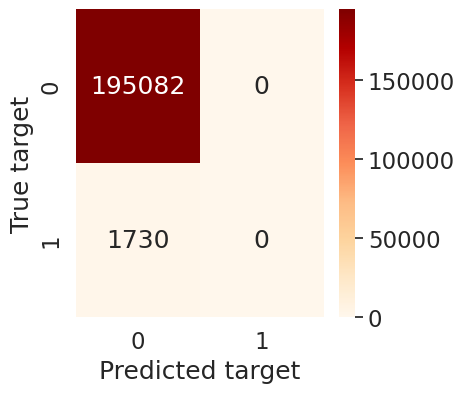

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.5)  # Font size adjustment

def rf_conf_mat(y_test, rf_pred):
    # Plotting Confusion Matrix
    cm = confusion_matrix(y_test, rf_pred)
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(cm, annot=True, cmap='OrRd', fmt='g')
    ax.set_xlabel("Predicted target")  # Model prediction
    ax.set_ylabel("True target")  # Dataset true target
    plt.show()

# Example usage:
# Assuming you have defined `y_test` and `rf_pred` before calling rf_conf_mat()
rf_conf_mat(y_test, rf_pred)


FEATURES IMPORTANCE

In [ ]:
features_dict = dict(zip(final_df.columns, dt.feature_importances_))
features_dict
sorting_g = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)
sort_gd = pd.DataFrame(sorting_g, columns=['Feature', 'Coefficient'])
sort_gd

NameError: ignored

In [ ]:
#Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False)

NameError: ignored

PREDICTION FOR THE 9 MONTH

In [ ]:
features2 =non_null_df
features2.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,Target
1,1043384,2,9.0,0,0,0,0,0,0,0,...,0.99,0.99,0,No,No,No,Yes,No,No,0
3,1043852,7,8.0,0,0,0,0,0,0,0,...,0.10,0.13,0,No,No,No,Yes,No,No,0
5,1044198,13,8.0,0,0,0,0,0,0,0,...,0.82,0.87,0,No,No,No,Yes,No,No,0
7,1045098,6,2.0,0,0,0,0,0,0,0,...,0.00,0.00,0,Yes,No,Yes,Yes,No,No,0
9,1045867,4,8.0,0,0,0,0,0,0,0,...,0.82,0.87,0,No,No,No,Yes,No,No,0


In [ ]:
# I
conditions = [(features2['sales_9_month']) < 1280000,
              ((features2['sales_9_month']) > 1279999) & ((features2['sales_9_month']) < 2400000),
             (features2['sales_9_month']) > 2239999]

# I create a list of the values I want to assign for each condition where:
# '0' is low quality, '1' is avrage quality and '2' is high quality.
values = [0, 1, 2]

# I create a new column named 'target' and use np.select to assign values to it using our lists as arguments
features2['target2'] = np.select(conditions, values)

features2.head()

<ipython-input-39-762c06dbaa64>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features2['target2'] = np.select(conditions, values)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,Target,target2
1,1043384,2,9.0,0,0,0,0,0,0,0,...,0.99,0,No,No,No,Yes,No,No,0,0
3,1043852,7,8.0,0,0,0,0,0,0,0,...,0.13,0,No,No,No,Yes,No,No,0,0
5,1044198,13,8.0,0,0,0,0,0,0,0,...,0.87,0,No,No,No,Yes,No,No,0,0
7,1045098,6,2.0,0,0,0,0,0,0,0,...,0.00,0,Yes,No,Yes,Yes,No,No,0,0
9,1045867,4,8.0,0,0,0,0,0,0,0,...,0.87,0,No,No,No,Yes,No,No,0,0


The code creates a new categorical column named 'target2' in the 'features2' dataframe based on specific conditions related to the 'sales_9_month' feature. It categorizes the 'sales_9_month' values as 'low quality', 'average quality', or 'high quality' based on different ranges. The np.select() function is used to apply these conditions and values to the 'target2' column, resulting in the classification of sales quality levels. The 'target2' column now contains the assigned values of 0, 1, or 2, corresponding to 'low quality', 'average quality', and 'high quality', respectively.

In [ ]:
features2.target2.value_counts()

0    984023
1        24
2        10
Name: target2, dtype: int64

In [ ]:
# set up random seed and create the X and y (train and test datasets)
np.random.seed(42)
X = features2.drop(["target2","Target"], axis=1)
y = features2["target2"]
X.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,1043384,2,9.0,0,0,0,0,0,0,0,...,0,0.99,0.99,0,No,No,No,Yes,No,No
3,1043852,7,8.0,0,0,0,0,0,0,0,...,0,0.10,0.13,0,No,No,No,Yes,No,No
5,1044198,13,8.0,0,0,0,0,0,0,0,...,0,0.82,0.87,0,No,No,No,Yes,No,No
7,1045098,6,2.0,0,0,0,0,0,0,0,...,0,0.00,0.00,0,Yes,No,Yes,Yes,No,No
9,1045867,4,8.0,0,0,0,0,0,0,0,...,0,0.82,0.87,0,No,No,No,Yes,No,No


In [ ]:
encoder2 = OrdinalEncoder()  # to convert No to 0 and Yes to 1

In [ ]:
converted_features2 = encoder.fit_transform(X)
converted_features2[0:5, :]

array([[  0., 377.,   9.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 100., 100.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.],
       [  1., 382.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,  11.,  14.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.],
       [  2., 388.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  83.,  88.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.],
       [  3., 381.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   1.,   1.,   0.,
          0.],
       [  4., 379.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  83.,  88.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.]])

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(converted_features2, y, test_size=0.2)
print(X_train2.shape, X_test2.shape)

(787245, 23) (196812, 23)


In [ ]:
y_train2.groupby(y_train2).count()

target2
0    787222
1        16
2         7
Name: target2, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dp2_scaler = scaler.fit(X_train2)
sp2_X_train = dp2_scaler.transform(X_train2)
sp2_X_test = dp2_scaler.transform(X_test2)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train2, y_train2 = ros.fit_resample(sp2_X_train, y_train2,)

In [ ]:
y_train2.value_counts()

0    787222
1    787222
2    787222
Name: target2, dtype: int64

In [ ]:
y_train2, len(y_train2)

(0          0
 1          0
 2          0
 3          0
 4          0
           ..
 2361661    2
 2361662    2
 2361663    2
 2361664    2
 2361665    2
 Name: target2, Length: 2361666, dtype: int64,
 2361666)

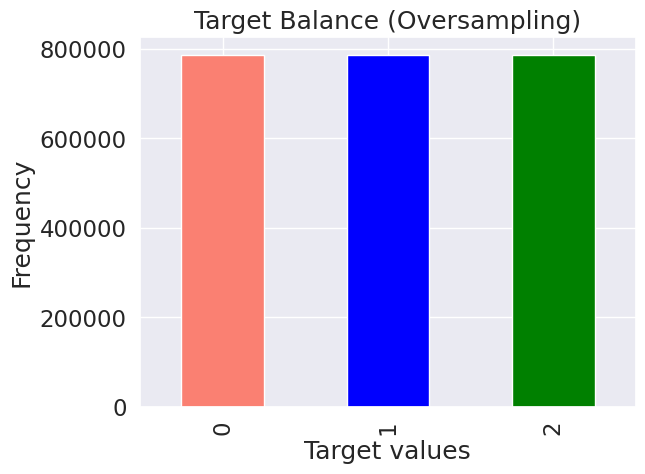

In [ ]:
y_train2.value_counts().plot(kind='bar', color=["salmon", "blue", "green"])
plt.title('Target Balance (Oversampling)')
plt.xlabel('Target values')
plt.ylabel('Frequency')
plt.show()

MODELS( LOGISTIC REGRESSION)

In [ ]:
# Initialize the logistic regression model
logreg = LogisticRegression(random_state=42)

# Fit the model on the training data
logreg.fit(X_train2, y_train2)

# Predict the labels on the test data
logreg_pred = logreg.predict(X_test2)

# Calculate accuracy score
logreg_accuracy = accuracy_score(y_test2, logreg_pred)

# Calculate cross validation score
logreg_cross_validation = cross_val_score(logreg, X_train2, y_train2, cv=5).mean()

# Calculate confusion matrix
logreg_conf_matrix = confusion_matrix(y_test2, logreg_pred)

# Print the results
print("Logistic Regression Accuracy Score:", logreg_accuracy * 100, "\n")
print("Logistic Regression Cross Validation Score:", logreg_cross_validation * 100, "\n")
print("Confusion Matrix:", "\n", logreg_conf_matrix, "\n")

# Generate classification report
print("Classification Report:", "\n", classification_report(y_test2, logreg_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Accuracy Score: 0.0015242972989451863 

Logistic Regression Cross Validation Score: 99.98649258725955 

Confusion Matrix: 
 [[     0     14 196787]
 [     0      0      8]
 [     0      0      3]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    196801
           1       0.00      0.00      0.00         8
           2       0.00      1.00      0.00         3

    accuracy                           0.00    196812
   macro avg       0.00      0.33      0.00    196812
weighted avg       0.00      0.00      0.00    196812



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Initialize the decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt.fit(X_train2, y_train2)

# Predict the labels on the test data
dt_pred = dt.predict(X_test2)

# Calculate accuracy score
dt_accuracy = accuracy_score(y_test2, dt_pred)

# Calculate cross validation score
dt_cross_validation = cross_val_score(dt, X_train2, y_train2, cv=5).mean()

# Calculate confusion matrix
dt_conf_matrix = confusion_matrix(y_test2, dt_pred)

# Print the results
print("Decision Tree Accuracy Score:", dt_accuracy * 100, "\n")
print("Decision Tree Cross Validation Score:", dt_cross_validation * 100, "\n")
print("Confusion Matrix:","\n", dt_conf_matrix, "\n")

# Generate classification report
print("Classification Report:", "\n", classification_report(y_test2, dt_pred))

Decision Tree Accuracy Score: 34.04721256833933 

Decision Tree Cross Validation Score: 100.0 

Confusion Matrix: 
 [[ 67006   6999 122796]
 [     0      0      8]
 [     0      0      3]] 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.34      0.51    196801
           1       0.00      0.00      0.00         8
           2       0.00      1.00      0.00         3

    accuracy                           0.34    196812
   macro avg       0.33      0.45      0.17    196812
weighted avg       1.00      0.34      0.51    196812



In [ ]:
PERFORMANCE 12 MONTH


PERFORMANCE 12 MONTH

In [ ]:
features3 =non_null_df
features3.head()


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,Target,target2
1,1043384,2,9.0,0,0,0,0,0,0,0,...,0.99,0,No,No,No,Yes,No,No,0,0
3,1043852,7,8.0,0,0,0,0,0,0,0,...,0.13,0,No,No,No,Yes,No,No,0,0
5,1044198,13,8.0,0,0,0,0,0,0,0,...,0.87,0,No,No,No,Yes,No,No,0,0
7,1045098,6,2.0,0,0,0,0,0,0,0,...,0.00,0,Yes,No,Yes,Yes,No,No,0,0
9,1045867,4,8.0,0,0,0,0,0,0,0,...,0.87,0,No,No,No,Yes,No,No,0,0


In [ ]:
# I
conditions = [
    (features3['perf_12_month_avg'] < 0),
    ((features3['perf_12_month_avg'] > 0) & (features2['perf_12_month_avg'] < 0.4)),
    ((features3['perf_12_month_avg'] > 0.4) & (features2['perf_12_month_avg'] < 0.7)),
    (features3['perf_12_month_avg'] > 0.7)
]

# I create a list of the values I want to assign for each condition where:
# '0' is low quality, '1' is avrage quality and '2' is high quality.
values = [0, 1, 2, 3]

# I create a new column named 'target' and use np.select to assign values to it using our lists as arguments
features3['target3'] = np.select(conditions, values)

features3.head()

<ipython-input-64-0f08d80f7d80>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features3['target3'] = np.select(conditions, values)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,Target,target2,target3
1,1043384,2,9.0,0,0,0,0,0,0,0,...,0,No,No,No,Yes,No,No,0,0,3
3,1043852,7,8.0,0,0,0,0,0,0,0,...,0,No,No,No,Yes,No,No,0,0,1
5,1044198,13,8.0,0,0,0,0,0,0,0,...,0,No,No,No,Yes,No,No,0,0,3
7,1045098,6,2.0,0,0,0,0,0,0,0,...,0,Yes,No,Yes,Yes,No,No,0,0,0
9,1045867,4,8.0,0,0,0,0,0,0,0,...,0,No,No,No,Yes,No,No,0,0,3


In [ ]:
features3.target3.value_counts()

3    718600
2    160253
1     60789
0     44415
Name: target3, dtype: int64

In [ ]:
# set up random seed and create the X and y (train and test datasets)
np.random.seed(42)
X = features3.drop(["target3","target2","Target"], axis=1)
y = features3["target3"]
X.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,1043384,2,9.0,0,0,0,0,0,0,0,...,0,0.99,0.99,0,No,No,No,Yes,No,No
3,1043852,7,8.0,0,0,0,0,0,0,0,...,0,0.10,0.13,0,No,No,No,Yes,No,No
5,1044198,13,8.0,0,0,0,0,0,0,0,...,0,0.82,0.87,0,No,No,No,Yes,No,No
7,1045098,6,2.0,0,0,0,0,0,0,0,...,0,0.00,0.00,0,Yes,No,Yes,Yes,No,No
9,1045867,4,8.0,0,0,0,0,0,0,0,...,0,0.82,0.87,0,No,No,No,Yes,No,No


In [ ]:
encoder3 = OrdinalEncoder()  # to convert No to 0 and Yes to 1

In [ ]:
converted_features3 = encoder.fit_transform(X)
converted_features3[0:5, :]

array([[  0., 377.,   9.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 100., 100.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.],
       [  1., 382.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,  11.,  14.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.],
       [  2., 388.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  83.,  88.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.],
       [  3., 381.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   1.,   1.,   0.,
          0.],
       [  4., 379.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  83.,  88.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.]])

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(converted_features3, y, test_size=0.2)
print(X_train3.shape, X_test3.shape)

(787245, 23) (196812, 23)


In [ ]:
y_train3.groupby(y_train3).count()

target3
0     35554
1     48588
2    128049
3    575054
Name: target3, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dp3_scaler = scaler.fit(X_train3)
sp3_X_train = dp3_scaler.transform(X_train3)
sp3_X_test = dp3_scaler.transform(X_test3)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train3, y_train3 = ros.fit_resample(sp3_X_train, y_train3,)

In [ ]:
y_train3.value_counts()

2    575054
3    575054
1    575054
0    575054
Name: target3, dtype: int64

In [ ]:
y_train3, len(y_train3)

(0          2
 1          3
 2          1
 3          3
 4          3
           ..
 2300211    2
 2300212    2
 2300213    2
 2300214    2
 2300215    2
 Name: target3, Length: 2300216, dtype: int64,
 2300216)

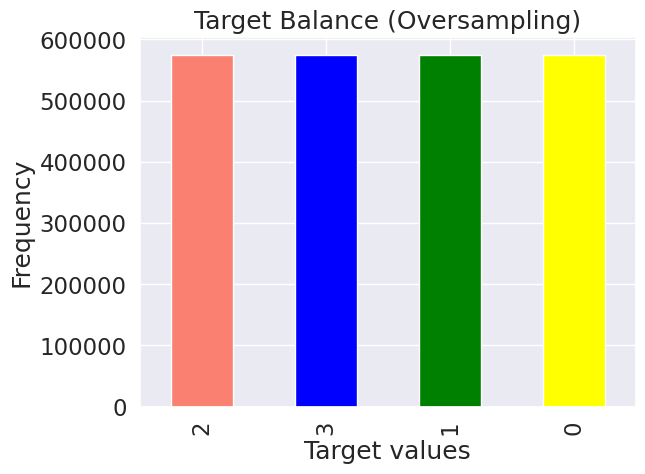

In [ ]:
y_train3 .value_counts().plot(kind='bar', color=["salmon", "blue", "green" ,"yellow"])
plt.title('Target Balance (Oversampling)')
plt.xlabel('Target values')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Initialize the logistic regression model
logreg = LogisticRegression(random_state=42)

# Fit the model on the training data
logreg.fit(X_train3, y_train3)

# Predict the labels on the test data
logreg_pred = logreg.predict(X_test3)

# Calculate accuracy score
logreg_accuracy = accuracy_score(y_test3, logreg_pred)

# Calculate cross validation score
logreg_cross_validation = cross_val_score(logreg, X_train3, y_train3, cv=5).mean()

# Calculate confusion matrix
logreg_conf_matrix = confusion_matrix(y_test3, logreg_pred)

# Print the results
print("Logistic Regression Accuracy Score:", logreg_accuracy * 100, "\n")
print("Logistic Regression Cross Validation Score:", logreg_cross_validation * 100, "\n")
print("Confusion Matrix:", "\n", logreg_conf_matrix, "\n")

# Generate classification report
print("Classification Report:", "\n", classification_report(y_test3, logreg_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Accuracy Score: 5.495599861797045 

Logistic Regression Cross Validation Score: 79.66273597913147 

Confusion Matrix: 
 [[  8850      0      0     11]
 [ 12149      0      0     52]
 [ 31930      0      0    274]
 [141580      0      0   1966]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.05      1.00      0.09      8861
           1       0.00      0.00      0.00     12201
           2       0.00      0.00      0.00     32204
           3       0.85      0.01      0.03    143546

    accuracy                           0.05    196812
   macro avg       0.22      0.25      0.03    196812
weighted avg       0.62      0.05      0.02    196812



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Initialize the decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt.fit(X_train3, y_train3)

# Predict the labels on the test data
dt_pred = dt.predict(X_test3)

# Calculate accuracy score
dt_accuracy = accuracy_score(y_test3, dt_pred)

# Calculate cross validation score
dt_cross_validation = cross_val_score(dt, X_train3, y_train3, cv=5).mean()

# Calculate confusion matrix
dt_conf_matrix = confusion_matrix(y_test3, dt_pred)

# Print the results
print("Decision Tree Accuracy Score:", dt_accuracy * 100, "\n")
print("Decision Tree Cross Validation Score:", dt_cross_validation * 100, "\n")
print("Confusion Matrix:","\n", dt_conf_matrix, "\n")

# Generate classification report
print("Classification Report:", "\n", classification_report(y_test3, dt_pred))

Decision Tree Accuracy Score: 72.93559335812857 

Decision Tree Cross Validation Score: 100.0 

Confusion Matrix: 
 [[     0      0      0   8861]
 [     0      0      0  12201]
 [     0      0      0  32204]
 [     0      0      0 143546]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      8861
           1       0.00      0.00      0.00     12201
           2       0.00      0.00      0.00     32204
           3       0.73      1.00      0.84    143546

    accuracy                           0.73    196812
   macro avg       0.18      0.25      0.21    196812
weighted avg       0.53      0.73      0.62    196812



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
